## Importing the table from Wikipedia Page, merging with the Latitude and Longitude Data and analysis of the postal codes with Clustering
    

#### Importing Necessary Libraries for the notebook

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Getting the table from the Wikipedia Page

In [3]:
import requests

website_url = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text

from bs4 import BeautifulSoup

soup = BeautifulSoup(website_url,"lxml")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XsmZgApAMM4AApd8vuoAAACN","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":958430791,"wgRevisionId":958430791,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto","Ontario

In [4]:
My_table = soup.find("table",{"class":"wikitable sortable"})
My_table


<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3B
</td>
<td>North York
</td>
<td>Don Mills
</td></tr>
<tr>
<

In [5]:
#The Headers of the Table:
links= My_table.find_all('th')
links

[<th>Postal Code
 </th>,
 <th>Borough
 </th>,
 <th>Neighborhood
 </th>]

In [6]:
#The entries in the Table:
links_entries= My_table.find_all('td')
links_entries

[<td>M1A
 </td>,
 <td>Not assigned
 </td>,
 <td>
 </td>,
 <td>M2A
 </td>,
 <td>Not assigned
 </td>,
 <td>
 </td>,
 <td>M3A
 </td>,
 <td>North York
 </td>,
 <td>Parkwoods
 </td>,
 <td>M4A
 </td>,
 <td>North York
 </td>,
 <td>Victoria Village
 </td>,
 <td>M5A
 </td>,
 <td>Downtown Toronto
 </td>,
 <td>Regent Park, Harbourfront
 </td>,
 <td>M6A
 </td>,
 <td>North York
 </td>,
 <td>Lawrence Manor, Lawrence Heights
 </td>,
 <td>M7A
 </td>,
 <td>Downtown Toronto
 </td>,
 <td>Queen's Park, Ontario Provincial Government
 </td>,
 <td>M8A
 </td>,
 <td>Not assigned
 </td>,
 <td>
 </td>,
 <td>M9A
 </td>,
 <td>Etobicoke
 </td>,
 <td>Islington Avenue, Humber Valley Village
 </td>,
 <td>M1B
 </td>,
 <td>Scarborough
 </td>,
 <td>Malvern, Rouge
 </td>,
 <td>M2B
 </td>,
 <td>Not assigned
 </td>,
 <td>
 </td>,
 <td>M3B
 </td>,
 <td>North York
 </td>,
 <td>Don Mills
 </td>,
 <td>M4B
 </td>,
 <td>East York
 </td>,
 <td>Parkview Hill, Woodbine Gardens
 </td>,
 <td>M5B
 </td>,
 <td>Downtown Toronto
 </td>,
 

#### Building the dataframe

In [7]:
A=[]
B=[]
C=[]

for row in My_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
       

In [8]:
import pandas as pd
df=pd.DataFrame(A,columns=['Postal Code'])
df['Borough']=B
df['Neighborhood']=C
df

,Postal Code,Borough,Neighborhood
0,M1A\n,Not assigned\n,\n
1,M2A\n,Not assigned\n,\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"
5,M6A\n,North York\n,"Lawrence Manor, Lawrence Heights\n"
6,M7A\n,Downtown Toronto\n,"Queen's Park, Ontario Provincial Government\n"
7,M8A\n,Not assigned\n,\n
8,M9A\n,Etobicoke\n,"Islington Avenue, Humber Valley Village\n"
9,M1B\n,Scarborough\n,"Malvern, Rouge\n"


In [9]:
#Removing the "\n" character from every cell

cols_to_check=["Postal Code","Borough","Neighborhood"]
df[cols_to_check] = df[cols_to_check].replace({'\n':''}, regex=True)

In [10]:
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Postal Code   180 non-null    object
 1   Borough       180 non-null    object
 2   Neighborhood  180 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


In [12]:
# Removing the "Not assigned" Borough cells

df[df["Borough"]=="Not assigned"].Borough.value_counts()

Not assigned    77
Name: Borough, dtype: int64

In [13]:
Final_df=df[df["Borough"]!="Not assigned"].reset_index()
Final_df=Final_df.drop("index", axis=1)
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Postal Code   103 non-null    object
 1   Borough       103 non-null    object
 2   Neighborhood  103 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [14]:
Final_df.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [15]:
#Checking if any Neighborhood is "Not assigned"
Final_df[Final_df["Neighborhood"]=="Not assigned"].Neighborhood.value_counts()

Series([], Name: Neighborhood, dtype: int64)

In [16]:
Final_df[Final_df["Neighborhood"]==" "].Neighborhood.value_counts()

Series([], Name: Neighborhood, dtype: int64)

In [18]:
#Final df shape:

Final_df.shape

(103, 3)

#### Importing the Latitude and Longitude Data

In [21]:
Coor_df=pd.read_csv("Geospatial_Coordinates.csv")

In [22]:
Coor_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [25]:
#Merging the data with the Final dataframe
df_merged = Final_df.join(Coor_df.set_index('Postal Code'), on='Postal Code')

In [26]:
df_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [28]:
print('The dataframe has {} boroughs and {} Postal Codes.'.format(
        len(df_merged['Borough'].unique()),
        df_merged.shape[0]
    )
)

The dataframe has 10 boroughs and 103 Postal Codes.


#### Use geopy library to get the latitude and longitude values of Toronto,CN.

In [38]:
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Create a map of Toronto with neighborhoods superimposed on top.

In [42]:
# create map of Toronto,CN using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, postel_code in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Borough'], df_merged['Postal Code']):
    label = '{}, {}'.format(postel_code, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [43]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postal Code   103 non-null    object 
 1   Borough       103 non-null    object 
 2   Neighborhood  103 non-null    object 
 3   Latitude      103 non-null    float64
 4   Longitude     103 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.1+ KB


##### For simplification, considering only the Borough where Toronto is there. Slicing the original dataframe and creating a new dataframe of the Toronto data.

In [58]:
Toronto_data=df_merged.query('Borough.str.contains("Toronto")', engine='python').reset_index(drop=True)

In [59]:
Toronto_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [60]:
Toronto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postal Code   39 non-null     object 
 1   Borough       39 non-null     object 
 2   Neighborhood  39 non-null     object 
 3   Latitude      39 non-null     float64
 4   Longitude     39 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.6+ KB


In [61]:
# create map of Toronto,CN using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, postel_code in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Borough'], Toronto_data['Postal Code']):
    label = '{}, {}'.format(postel_code, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

Utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [54]:
CLIENT_ID = 'LF0AQT14JDWBXCZ43ILHFUGNCVGDCTOMVOHMPX2R2KQ5KAOA' # your Foursquare ID
CLIENT_SECRET = 'ZJYBB0M4AMVYHQNIF4SEZQ1GLOU5ALSOZZQXYWB13U3GVUET' # your Foursquare Secret
VERSION = '20200529'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LF0AQT14JDWBXCZ43ILHFUGNCVGDCTOMVOHMPX2R2KQ5KAOA
CLIENT_SECRET:ZJYBB0M4AMVYHQNIF4SEZQ1GLOU5ALSOZZQXYWB13U3GVUET


#### Let's explore the first postal code in our dataframe.

In [64]:
Toronto_data.loc[0, 'Postal Code']

'M5A'

In [67]:
#Getting the latitude and Longitude of the postal code:

PC_latitude = Toronto_data.loc[0, 'Latitude'] # Postal code latitude value
PC_longitude = Toronto_data.loc[0, 'Longitude'] # Postal code longitude value

PC_name = Toronto_data.loc[0, 'Postal Code'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(PC_name, 
                                                               PC_latitude, 
                                                               PC_longitude))

Latitude and longitude values of M5A are 43.6542599, -79.3606359.


#### Getting the top 100 venues that are in M5A postal code within a radius of 500 meters.

In [69]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    PC_latitude, 
    PC_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=LF0AQT14JDWBXCZ43ILHFUGNCVGDCTOMVOHMPX2R2KQ5KAOA&client_secret=ZJYBB0M4AMVYHQNIF4SEZQ1GLOU5ALSOZZQXYWB13U3GVUET&v=20200529&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [70]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ecfc6855fb726001b93c6d2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 49,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

In [71]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [72]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\babba\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
3,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
4,Body Blitz Spa East,Spa,43.654735,-79.359874


In [73]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

49 venues were returned by Foursquare.


## Exploring Neighborhoods in Toronto

In [76]:
# Function for repeating the process in all postal codes of Toronto

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code', 
                  'Postal Code Latitude', 
                  'Postal Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [77]:
Toronto_venues = getNearbyVenues(names=Toronto_data['Postal Code'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )



M5A
M7A
M5B
M5C
M4E
M5E
M5G
M6G
M5H
M6H
M5J
M6J
M4K
M5K
M6K
M4L
M5L
M4M
M4N
M5N
M4P
M5P
M6P
M4R
M5R
M6R
M4S
M5S
M6S
M4T
M5T
M4V
M5V
M4W
M5W
M4X
M5X
M4Y
M7Y


In [78]:
print(Toronto_venues.shape)
Toronto_venues.head()

(1619, 7)


,Postal Code,Postal Code Latitude,Postal Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M5A,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,M5A,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,M5A,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,M5A,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,M5A,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [79]:
#Venues returned by each Postal Code:
Toronto_venues.groupby('Postal Code').count()

,Postal Code Latitude,Postal Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postal Code,,,,,,
M4E,4,4,4,4,4,4
M4K,42,42,42,42,42,42
M4L,21,21,21,21,21,21
M4M,40,40,40,40,40,40
M4N,3,3,3,3,3,3
M4P,8,8,8,8,8,8
M4R,19,19,19,19,19,19
M4S,32,32,32,32,32,32
M4T,4,4,4,4,4,4


In [80]:
#Unique Categories:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 235 uniques categories.


## Analyzing Each Postal Code

In [82]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add postal code column back to dataframe
Toronto_onehot['Postal Code'] = Toronto_venues['Postal Code'] 

# move postal column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Postal Code,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M5A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M5A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [83]:
Toronto_onehot.shape

(1619, 236)

In [85]:
#Grouping each row by postal code by taking the mean of the frequency of occurrence of each category
Toronto_grouped = Toronto_onehot.groupby('Postal Code').mean().reset_index()
Toronto_grouped

,Postal Code,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M4E,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [86]:
Toronto_grouped.shape

(39, 236)

#### Printing each postal along with the top 5 most common venues

In [87]:
num_top_venues = 5

for hood in Toronto_grouped['Postal Code']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Postal Code'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M4E----
               venue  freq
0       Neighborhood  0.25
1              Trail  0.25
2  Health Food Store  0.25
3                Pub  0.25
4             Museum  0.00


----M4K----
                    venue  freq
0        Greek Restaurant  0.21
1      Italian Restaurant  0.07
2             Coffee Shop  0.07
3          Ice Cream Shop  0.05
4  Furniture / Home Store  0.05


----M4L----
                  venue  freq
0                  Park  0.10
1        Sandwich Place  0.10
2  Fast Food Restaurant  0.10
3                   Gym  0.05
4      Sushi Restaurant  0.05


----M4M----
                 venue  freq
0                 Café  0.10
1          Coffee Shop  0.08
2              Brewery  0.05
3  American Restaurant  0.05
4            Gastropub  0.05


----M4N----
               venue  freq
0               Park  0.33
1           Bus Line  0.33
2        Swim School  0.33
3  Afghan Restaurant  0.00
4             Museum  0.00


----M4P----
               venue  freq
0                Gym 

#### Putting values in a dataframe.

In [88]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [119]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postal Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
PC_venues_sorted = pd.DataFrame(columns=columns)
PC_venues_sorted['Postal Code'] = Toronto_grouped['Postal Code']

for ind in np.arange(Toronto_grouped.shape[0]):
    PC_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

PC_venues_sorted.head()

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,Pub,Trail,Neighborhood,Health Food Store,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio
1,M4K,Greek Restaurant,Italian Restaurant,Coffee Shop,Furniture / Home Store,Restaurant,Ice Cream Shop,Yoga Studio,Spa,Bookstore,Brewery
2,M4L,Park,Sandwich Place,Fast Food Restaurant,Gym,Brewery,Burrito Place,Restaurant,Pub,Coffee Shop,Movie Theater
3,M4M,Café,Coffee Shop,Gastropub,Bakery,American Restaurant,Brewery,Yoga Studio,Sandwich Place,Fish Market,Italian Restaurant
4,M4N,Park,Swim School,Bus Line,Yoga Studio,Dessert Shop,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


## Clustering Neighborhoods

In [120]:
Toronto_grouped_clustering = Toronto_grouped.drop('Postal Code', 1)
Toronto_grouped_clustering.head()

,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00

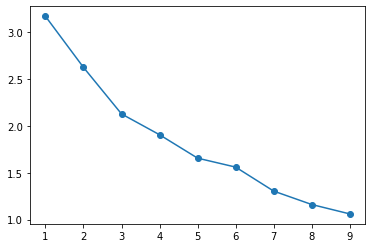

In [121]:
#Checking the most efficient value of K:
#Elbow Method
import matplotlib.pyplot as plt
%matplotlib inline

cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( Toronto_grouped_clustering )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

#### Best value of K="6"

In [122]:
# run k-means clustering
# set number of clusters
kclusters = 6
kmeans = KMeans(n_clusters=kclusters, n_jobs = -1, init='k-means++',n_init = 12).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 1, 1, 5, 1, 1, 1, 0, 1])

In [123]:
# add clustering labels
PC_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(PC_venues_sorted.set_index('Postal Code'), on='Postal Code')

Toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Café,Restaurant,Theater,Yoga Studio,Mexican Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Coffee Shop,Yoga Studio,Diner,Park,Music Venue,Mexican Restaurant,Italian Restaurant,Hobby Shop,General Entertainment,Fried Chicken Joint
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Clothing Store,Coffee Shop,Italian Restaurant,Middle Eastern Restaurant,Café,Japanese Restaurant,Restaurant,Cosmetics Shop,Bubble Tea Shop,Tea Room
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Cocktail Bar,Gastropub,American Restaurant,Restaurant,Beer Bar,Hotel,Italian Restaurant,Lingerie Store
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Pub,Trail,Neighborhood,Health Food Store,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio


In [132]:
#Visualizing the clusters:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Postal Code'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining Clusters

#### Cluster 1: Park, Playground Area

In [125]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,0,Summer Camp,Park,Playground,Tennis Court,Yoga Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Doner Restaurant
33,Downtown Toronto,0,Park,Playground,Trail,Yoga Studio,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


#### Cluster 2: Eateries, shopping area

In [126]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,1,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Café,Restaurant,Theater,Yoga Studio,Mexican Restaurant
1,Downtown Toronto,1,Coffee Shop,Yoga Studio,Diner,Park,Music Venue,Mexican Restaurant,Italian Restaurant,Hobby Shop,General Entertainment,Fried Chicken Joint
2,Downtown Toronto,1,Clothing Store,Coffee Shop,Italian Restaurant,Middle Eastern Restaurant,Café,Japanese Restaurant,Restaurant,Cosmetics Shop,Bubble Tea Shop,Tea Room
3,Downtown Toronto,1,Coffee Shop,Café,Cocktail Bar,Gastropub,American Restaurant,Restaurant,Beer Bar,Hotel,Italian Restaurant,Lingerie Store
5,Downtown Toronto,1,Coffee Shop,Cocktail Bar,Cheese Shop,Beer Bar,Bakery,Seafood Restaurant,Restaurant,Café,Park,Irish Pub
6,Downtown Toronto,1,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Ice Cream Shop,Japanese Restaurant,Bubble Tea Shop,Thai Restaurant,Salad Place,Burger Joint
7,Downtown Toronto,1,Grocery Store,Café,Park,Baby Store,Diner,Restaurant,Italian Restaurant,Athletics & Sports,Coffee Shop,Nightclub
8,Downtown Toronto,1,Coffee Shop,Café,Restaurant,Gym,Deli / Bodega,Clothing Store,Hotel,Thai Restaurant,Bookstore,Pizza Place
9,West Toronto,1,Pharmacy,Bakery,Music Venue,Supermarket,Bar,Bank,Brewery,Athletics & Sports,Café,Furniture / Home Store
10,Downtown Toronto,1,Coffee Shop,Aquarium,Hotel,Café,Fried Chicken Joint,Scenic Lookout,Restaurant,Brewery,Italian Restaurant,Sporting Goods Shop


#### Cluster 3: Central, Musical Venues

In [127]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,2,Music Venue,Garden,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


#### Cluster 4: Central, Jewelry market

In [128]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,3,Jewelry Store,Trail,Sushi Restaurant,Bus Line,Yoga Studio,Diner,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


#### Cluster 5: Pub Area

In [129]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,East Toronto,4,Pub,Trail,Neighborhood,Health Food Store,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio


#### Cluster 6: Central, parks

In [130]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 5, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,5,Park,Swim School,Bus Line,Yoga Studio,Dessert Shop,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
